# Importação e Leitura

In [93]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import os
import duckdb

In [64]:
df = pd.read_csv("../Motor_Vehicle_Collisions_-_Crashes_20251015.csv")
df

/tmp/ipykernel_61403/203287006.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Motor_Vehicle_Collisions_-_Crashes_20251015.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212907,10/09/2016,9:30,STATEN ISLAND,10305.0,40.612595,-74.071655,"(40.612595, -74.071655)",NaN,NaN,254 CLIFTON AVENUE,...,NaN,NaN,NaN,NaN,3536789,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2212908,09/20/2016,12:30,BROOKLYN,11229.0,40.610725,-73.955574,"(40.610725, -73.955574)",NaN,NaN,1804 AVENUE P,...,Unspecified,NaN,NaN,NaN,3527277,Sedan,Sedan,NaN,NaN,NaN
2212909,09/19/2016,13:00,NaN,NaN,40.611767,-73.976380,"(40.611767, -73.97638)",24 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,3523434,Sedan,NaN,NaN,NaN,NaN
2212910,09/28/2016,11:20,NaN,NaN,40.620560,-73.989440,"(40.62056, -73.98944)",63 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3529408,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN


## Verificando nulos

In [65]:
df.isnull().sum().sum() # Muitos valores nulos impossivel exclui-los

np.int64(18922504)

In [66]:
df.isna().sum() # colunas off street name, contributing factor 3 veicle ate o 5 , vehicle type code 3 ate o 5 sao colunas com muitos valores nulos
missing_percent = df.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))

VEHICLE TYPE CODE 5              99.561799
CONTRIBUTING FACTOR VEHICLE 5    99.547564
VEHICLE TYPE CODE 4              98.408116
CONTRIBUTING FACTOR VEHICLE 4    98.348556
VEHICLE TYPE CODE 3              93.045860
CONTRIBUTING FACTOR VEHICLE 3    92.765325
OFF STREET NAME                  82.421352
CROSS STREET NAME                38.204095
ZIP CODE                         30.683687
BOROUGH                          30.671260
ON STREET NAME                   21.752966
VEHICLE TYPE CODE 2              20.007935
CONTRIBUTING FACTOR VEHICLE 2    16.022553
LOCATION                         10.858679
LATITUDE                         10.858679
LONGITUDE                        10.858679
VEHICLE TYPE CODE 1               0.723797
CONTRIBUTING FACTOR VEHICLE 1     0.352070
NUMBER OF PERSONS KILLED          0.001401
NUMBER OF PERSONS INJURED         0.000813
CRASH DATE                        0.000000
NUMBER OF PEDESTRIANS INJURED     0.000000
CRASH TIME                        0.000000
NUMBER OF M

# Lidando Com Outliers

In [67]:
# Converte os outliars de longitude e latitude em Nan
lat_min, lat_max = 40.49, 40.92
lon_min, lon_max = -74.26, -73.69
filtro_invalidas = (
    (df['LATITUDE'] < lat_min) | (df['LATITUDE'] > lat_max) |
    (df['LONGITUDE'] < lon_min) | (df['LONGITUDE'] > lon_max)
)
df.loc[filtro_invalidas, ['LATITUDE', 'LONGITUDE']] = np.nan

## Lidando Com Missing Values

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212912 entries, 0 to 2212911
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [69]:
num_cols_auto = df.select_dtypes(include=['number']).columns.to_list()
cat_cols_auto = df.select_dtypes(include=['object']).columns.to_list()
num_cols_imputar = [
    col for col in num_cols_auto 
    if col not in ['LATITUDE', 'LONGITUDE', 'COLLISION_ID'] #numericos a serem inputados por mediana 
]
cat_cols_imput = [
    col for col in cat_cols_auto
    if col not in ['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'OFF STREET NAME'] 
] # categoricos a serem inputados por mais frequente, porem algumas colunas nao faz sentido este metodo

lat_long_imput = ['LATITUDE', 'LONGITUDE'] # precisa de um inputer especial

non_existent_cols = ['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'OFF STREET NAME'] # estem precisam ser trocados por 0 ou N/A'
#indicam que estem fatores nao estao presentes no acidente, inputacao tradicional causaria vies 
cat_cols_imputar = cat_cols_imput

In [70]:
transformers_imput = [
    ('num_imputer', SimpleImputer(strategy='median'), num_cols_imputar),
    ('freq_imputer', SimpleImputer(strategy='most_frequent'), cat_cols_imputar),
    # ('lat_long_imputer', SimpleImputer(strategy='median'), lat_long_imput)
    ('absent_flag_imputer', SimpleImputer(strategy='constant', fill_value='N/A'), non_existent_cols),
]
ct_imput = ColumnTransformer(transformers_imput, remainder='passthrough')
df_imputed_array = ct_imput.fit_transform(df)

# Obter nomes das colunas 'remainder'
imputed_cols = num_cols_imputar + cat_cols_imputar + non_existent_cols
all_cols_original = df.columns.tolist()
remainder_cols = [col for col in all_cols_original if col not in imputed_cols]

# Ordem correta das colunas no array
nova_ordem_colunas = num_cols_imputar + cat_cols_imputar + non_existent_cols + remainder_cols

# Reconstruir
df_imputed = pd.DataFrame(df_imputed_array, columns=nova_ordem_colunas)

colunas_numericas_finais = num_cols_imputar + remainder_cols

for col in colunas_numericas_finais:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce')

#input separado para latitude e longitude baseado no bairro
df_imputed['LATITUDE'] = df_imputed.groupby('BOROUGH')['LATITUDE'].transform(
    lambda x: x.fillna(x.median())
)

df_imputed['LONGITUDE'] = df_imputed.groupby('BOROUGH')['LONGITUDE'].transform(
    lambda x: x.fillna(x.median())
)

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212912 entries, 0 to 2212911
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   NUMBER OF PERSONS INJURED      float64
 1   NUMBER OF PERSONS KILLED       float64
 2   NUMBER OF PEDESTRIANS INJURED  float64
 3   NUMBER OF PEDESTRIANS KILLED   float64
 4   NUMBER OF CYCLIST INJURED      float64
 5   NUMBER OF CYCLIST KILLED       float64
 6   NUMBER OF MOTORIST INJURED     float64
 7   NUMBER OF MOTORIST KILLED      float64
 8   CRASH DATE                     object 
 9   CRASH TIME                     object 
 10  BOROUGH                        object 
 11  ZIP CODE                       object 
 12  LOCATION                       object 
 13  ON STREET NAME                 object 
 14  CROSS STREET NAME              object 
 15  CONTRIBUTING FACTOR VEHICLE 1  object 
 16  CONTRIBUTING FACTOR VEHICLE 2  object 
 17  VEHICLE TYPE CODE 1            object 
 18  VE

In [71]:
df_imputed

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CRASH DATE,CRASH TIME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,OFF STREET NAME,LATITUDE,LONGITUDE,COLLISION_ID
0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,09/11/2021,2:39,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4455765.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,03/26/2022,11:45,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4513547.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11/01/2023,1:29,...,Unspecified,N/A,N/A,Sedan,N/A,N/A,N/A,40.621790,-73.970024,4675373.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06/29/2022,6:55,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4541903.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/21/2022,13:21,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4566131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/09/2016,9:30,...,N/A,N/A,N/A,N/A,N/A,N/A,254 CLIFTON AVENUE,40.612595,-74.071655,3536789.0
2212908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/20/2016,12:30,...,N/A,N/A,N/A,N/A,N/A,N/A,1804 AVENUE P,40.610725,-73.955574,3527277.0
2212909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/19/2016,13:00,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.611767,-73.976380,3523434.0
2212910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/28/2016,11:20,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.620560,-73.989440,3529408.0


In [72]:
df_imputed.isna().sum() 
missing_percent = df_imputed.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))

NUMBER OF PERSONS INJURED        0.0
NUMBER OF PERSONS KILLED         0.0
NUMBER OF PEDESTRIANS INJURED    0.0
NUMBER OF PEDESTRIANS KILLED     0.0
NUMBER OF CYCLIST INJURED        0.0
NUMBER OF CYCLIST KILLED         0.0
NUMBER OF MOTORIST INJURED       0.0
NUMBER OF MOTORIST KILLED        0.0
CRASH DATE                       0.0
CRASH TIME                       0.0
BOROUGH                          0.0
ZIP CODE                         0.0
LOCATION                         0.0
ON STREET NAME                   0.0
CROSS STREET NAME                0.0
CONTRIBUTING FACTOR VEHICLE 1    0.0
CONTRIBUTING FACTOR VEHICLE 2    0.0
VEHICLE TYPE CODE 1              0.0
VEHICLE TYPE CODE 2              0.0
CONTRIBUTING FACTOR VEHICLE 3    0.0
CONTRIBUTING FACTOR VEHICLE 4    0.0
CONTRIBUTING FACTOR VEHICLE 5    0.0
VEHICLE TYPE CODE 3              0.0
VEHICLE TYPE CODE 4              0.0
VEHICLE TYPE CODE 5              0.0
OFF STREET NAME                  0.0
LATITUDE                         0.0
L

# Resolvendo inconsistências

In [75]:
try:
    #este codigo estava com df inves do inputed por isto estava gerando resultados incorretos,
    #agora esta usando o inputed se usar o df original seria melhor antes de inputar
    # df = pd.read_csv('df_8_14_colunas.csv')
    # print(f"--- Carregado 'df_8_14_colunas.csv' para Identificação ---")
    
    # 1. Identificar todas as colunas que são do tipo 'object' (texto)
    object_cols = df_imputed.select_dtypes(include=['object']).columns
    
    if len(object_cols) == 0:
        print("Nenhuma coluna de texto (object) encontrada neste arquivo.")
    else:
        print(f"Colunas de texto (object) encontradas: {list(object_cols)}")
        
        # Limite para decidir se imprimimos todos os valores únicos
        low_cardinality_threshold = 50 
        
        print("\n--- 2. Análise de Valores Únicos (Identificação) ---")
        
        for col in object_cols:
            num_unique = df_imputed[col].nunique()
            
            print(f"\nColuna: '{col}' | Total de Valores Únicos: {num_unique}")
            
            # Se a coluna tiver poucos valores únicos, é categórica.
            # Vamos imprimir as contagens para o usuário ver.
            if num_unique <= low_cardinality_threshold:
                print("Contagem de valores (value_counts):")
                # Imprimir .value_counts() que já vem ordenado
                print(df_imputed[col].value_counts(dropna=False)) # dropna=False para vermos os NaNs
            else:
                print(f"Cardinalidade muito alta. Exibindo 5 valores de exemplo:")
                print(df_imputed[col].sample(5, random_state=1).to_list())
except FileNotFoundError:
    print("Erro: O arquivo 'df_8_14_colunas.csv' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Colunas de texto (object) encontradas: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'OFF STREET NAME']

--- 2. Análise de Valores Únicos (Identificação) ---

Coluna: 'CRASH DATE' | Total de Valores Únicos: 4851
Cardinalidade muito alta. Exibindo 5 valores de exemplo:
['09/28/2022', '09/26/2019', '05/16/2014', '01/06/2013', '02/22/2013']

Coluna: 'CRASH TIME' | Total de Valores Únicos: 1440
Cardinalidade muito alta. Exibindo 5 valores de exemplo:
['22:00', '17:46', '6:10', '15:21', '16:20']

Coluna: 'BOROUGH' | Total de Valores Únicos: 5
Contagem de valores (value_counts):
BOROUGH
BROOKLYN         1170208
QUEENS            411120
MANHATTAN         340108


In [74]:
#usado para descobrir problema descrito no inicio do bloco acima
# for col in df_imputed.columns:
#     n_real = df_imputed[col].isna().sum()
#     n_string_nan = (df_imputed[col] == "nan").sum()
#     n_empty = (df_imputed[col] == "").sum()

#     print(f"{col}: NaN reais={n_real} | 'nan' string={n_string_nan} | vazio={n_empty}")


NUMBER OF PERSONS INJURED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF PERSONS KILLED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF PEDESTRIANS INJURED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF PEDESTRIANS KILLED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF CYCLIST INJURED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF CYCLIST KILLED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF MOTORIST INJURED: NaN reais=0 | 'nan' string=0 | vazio=0
NUMBER OF MOTORIST KILLED: NaN reais=0 | 'nan' string=0 | vazio=0
CRASH DATE: NaN reais=0 | 'nan' string=0 | vazio=0
CRASH TIME: NaN reais=0 | 'nan' string=0 | vazio=0
BOROUGH: NaN reais=0 | 'nan' string=0 | vazio=0
ZIP CODE: NaN reais=0 | 'nan' string=0 | vazio=0
LOCATION: NaN reais=0 | 'nan' string=0 | vazio=0
ON STREET NAME: NaN reais=0 | 'nan' string=0 | vazio=0
CROSS STREET NAME: NaN reais=0 | 'nan' string=0 | vazio=0
CONTRIBUTING FACTOR VEHICLE 1: NaN reais=0 | 'nan' string=0 | vazio=0
CONTRIBUTING FACTOR VEHICLE 2: NaN 

In [ ]:
#nao necessario apos solucao acima
# (df_imputed.replace("nan", np.nan)
#            .replace("NaN", np.nan)
#            .replace("", np.nan)
#            .isna()
#            .sum()
#            .sort_values(ascending=False))


In [ ]:
#descomentar se for importante
# df_reduzido = df_imputed.iloc[:, 14:16]
# df_reduzido.to_csv("df_14_16_colunas.csv", index=False)

In [77]:
df_imputed

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CRASH DATE,CRASH TIME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,OFF STREET NAME,LATITUDE,LONGITUDE,COLLISION_ID
0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,09/11/2021,2:39,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4455765.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,03/26/2022,11:45,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4513547.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11/01/2023,1:29,...,Unspecified,N/A,N/A,Sedan,N/A,N/A,N/A,40.621790,-73.970024,4675373.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06/29/2022,6:55,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4541903.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/21/2022,13:21,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4566131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/09/2016,9:30,...,N/A,N/A,N/A,N/A,N/A,N/A,254 CLIFTON AVENUE,40.612595,-74.071655,3536789.0
2212908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/20/2016,12:30,...,N/A,N/A,N/A,N/A,N/A,N/A,1804 AVENUE P,40.610725,-73.955574,3527277.0
2212909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/19/2016,13:00,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.611767,-73.976380,3523434.0
2212910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09/28/2016,11:20,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,40.620560,-73.989440,3529408.0


In [ ]:
#esta faltando data cleaning, dados como Taxi e TAXI existem diferentemente no dataset precisa ser resolvido

# Resolvendo Tipos

In [78]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212912 entries, 0 to 2212911
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   NUMBER OF PERSONS INJURED      float64
 1   NUMBER OF PERSONS KILLED       float64
 2   NUMBER OF PEDESTRIANS INJURED  float64
 3   NUMBER OF PEDESTRIANS KILLED   float64
 4   NUMBER OF CYCLIST INJURED      float64
 5   NUMBER OF CYCLIST KILLED       float64
 6   NUMBER OF MOTORIST INJURED     float64
 7   NUMBER OF MOTORIST KILLED      float64
 8   CRASH DATE                     object 
 9   CRASH TIME                     object 
 10  BOROUGH                        object 
 11  ZIP CODE                       object 
 12  LOCATION                       object 
 13  ON STREET NAME                 object 
 14  CROSS STREET NAME              object 
 15  CONTRIBUTING FACTOR VEHICLE 1  object 
 16  CONTRIBUTING FACTOR VEHICLE 2  object 
 17  VEHICLE TYPE CODE 1            object 
 18  VE

In [79]:
df_typed = df_imputed.copy()

# Convertendo colunas que comecam com "NUMBER" para int
number_cols = [col for col in df_typed.columns if col.startswith("NUMBER")]
for col in number_cols:
    df_typed[col] = pd.to_numeric(df_typed[col], errors='coerce').astype('Int64')


df_typed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212912 entries, 0 to 2212911
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   NUMBER OF PERSONS INJURED      Int64  
 1   NUMBER OF PERSONS KILLED       Int64  
 2   NUMBER OF PEDESTRIANS INJURED  Int64  
 3   NUMBER OF PEDESTRIANS KILLED   Int64  
 4   NUMBER OF CYCLIST INJURED      Int64  
 5   NUMBER OF CYCLIST KILLED       Int64  
 6   NUMBER OF MOTORIST INJURED     Int64  
 7   NUMBER OF MOTORIST KILLED      Int64  
 8   CRASH DATE                     object 
 9   CRASH TIME                     object 
 10  BOROUGH                        object 
 11  ZIP CODE                       object 
 12  LOCATION                       object 
 13  ON STREET NAME                 object 
 14  CROSS STREET NAME              object 
 15  CONTRIBUTING FACTOR VEHICLE 1  object 
 16  CONTRIBUTING FACTOR VEHICLE 2  object 
 17  VEHICLE TYPE CODE 1            object 
 18  VE

In [81]:
#visualizado colunas de datas
date_cols = [col for col in df_typed.columns if 'DATE' in col.upper() or 'TIME' in col.upper()]
print("Date/Time columns found:")
print(date_cols)
print("\nSample values:")
for col in date_cols:
    print(f"\n{col}:")
    print(df_typed[col].head())

Date/Time columns found:
['CRASH DATE', 'CRASH TIME']

Sample values:

CRASH DATE:
0    09/11/2021
1    03/26/2022
2    11/01/2023
3    06/29/2022
4    09/21/2022
Name: CRASH DATE, dtype: object

CRASH TIME:
0     2:39
1    11:45
2     1:29
3     6:55
4    13:21
Name: CRASH TIME, dtype: object


In [82]:
# unificando CRASH DATE e CRASH TIME em uma unica coluna datetime
df_typed['CRASH_DATETIME'] = pd.to_datetime(
    df_typed['CRASH DATE'] + ' ' + df_typed['CRASH TIME'], 
    format='%m/%d/%Y %H:%M',
    errors='coerce'
)

print("New CRASH_DATETIME column created:")
print(df_typed[['CRASH DATE', 'CRASH TIME', 'CRASH_DATETIME']].head(10))
print(f"\nData type: {df_typed['CRASH_DATETIME'].dtype}")
print(f"Null values: {df_typed['CRASH_DATETIME'].isna().sum()}")

# Dropando as colunas originais de data e hora
df_typed = df_typed.drop(columns=['CRASH DATE', 'CRASH TIME'])
print("\n--- After dropping CRASH DATE and CRASH TIME ---")
print(df_typed.info())

New CRASH_DATETIME column created:
   CRASH DATE CRASH TIME      CRASH_DATETIME
0  09/11/2021       2:39 2021-09-11 02:39:00
1  03/26/2022      11:45 2022-03-26 11:45:00
2  11/01/2023       1:29 2023-11-01 01:29:00
3  06/29/2022       6:55 2022-06-29 06:55:00
4  09/21/2022      13:21 2022-09-21 13:21:00
5  04/26/2023      13:30 2023-04-26 13:30:00
6  11/01/2023       7:12 2023-11-01 07:12:00
7  11/01/2023       8:01 2023-11-01 08:01:00
8  04/26/2023      22:20 2023-04-26 22:20:00
9  09/11/2021       9:35 2021-09-11 09:35:00

Data type: datetime64[ns]
Null values: 0

--- After dropping CRASH DATE and CRASH TIME ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212912 entries, 0 to 2212911
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   NUMBER OF PERSONS INJURED      Int64         
 1   NUMBER OF PERSONS KILLED       Int64         
 2   NUMBER OF PEDESTRIANS INJURED  Int64         
 3   NUMBE

In [83]:
# o que sobrou de object sao strings
object_cols = df_typed.select_dtypes(include=['object']).columns.tolist()
print(f"Converting {len(object_cols)} object columns to string type:")
print(object_cols)

for col in object_cols:
    df_typed[col] = df_typed[col].astype('string')

print("\n--- After converting objects to strings ---")
print(df_typed.info())

Converting 16 object columns to string type:
['BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'OFF STREET NAME']

--- After converting objects to strings ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212912 entries, 0 to 2212911
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   NUMBER OF PERSONS INJURED      Int64         
 1   NUMBER OF PERSONS KILLED       Int64         
 2   NUMBER OF PEDESTRIANS INJURED  Int64         
 3   NUMBER OF PEDESTRIANS KILLED   Int64         
 4   NUMBER OF CYCLIST INJURED      Int64         
 5   NUMBER OF CYCLIST KILLED       Int64         
 6   NUMBER OF 

In [87]:
#versao sem ID e dropando location ja que e a mesma coisa de lat long, alem de renomear o dataset final
df_typed = df_typed.drop(columns = ['LOCATION'])
df_noid = df_typed.drop(columns=['COLLISION_ID'])
print(df_noid)
df_noid.info()
df_cleaned = df_typed

         NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                                2                         0   
1                                1                         0   
2                                1                         0   
3                                0                         0   
4                                0                         0   
...                            ...                       ...   
2212907                          0                         0   
2212908                          0                         0   
2212909                          0                         0   
2212910                          0                         0   
2212911                          0                         0   

         NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                                    0                             0   
1                                    0                             0   
2              

In [90]:
#dataset final limpo
df_cleaned

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,BOROUGH,ZIP CODE,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,OFF STREET NAME,LATITUDE,LONGITUDE,COLLISION_ID,CRASH_DATETIME
0,2,0,0,0,0,0,2,0,BROOKLYN,11207.0,...,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4455765.0,2021-09-11 02:39:00
1,1,0,0,0,0,0,1,0,BROOKLYN,11207.0,...,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4513547.0,2022-03-26 11:45:00
2,1,0,0,0,0,0,1,0,BROOKLYN,11230.0,...,N/A,N/A,Sedan,N/A,N/A,N/A,40.621790,-73.970024,4675373.0,2023-11-01 01:29:00
3,0,0,0,0,0,0,0,0,BROOKLYN,11207.0,...,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4541903.0,2022-06-29 06:55:00
4,0,0,0,0,0,0,0,0,BROOKLYN,11207.0,...,N/A,N/A,N/A,N/A,N/A,N/A,40.678980,-73.940620,4566131.0,2022-09-21 13:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212907,0,0,0,0,0,0,0,0,STATEN ISLAND,10305.0,...,N/A,N/A,N/A,N/A,N/A,254 CLIFTON AVENUE,40.612595,-74.071655,3536789.0,2016-10-09 09:30:00
2212908,0,0,0,0,0,0,0,0,BROOKLYN,11229.0,...,N/A,N/A,N/A,N/A,N/A,1804 AVENUE P,40.610725,-73.955574,3527277.0,2016-09-20 12:30:00
2212909,0,0,0,0,0,0,0,0,BROOKLYN,11207.0,...,N/A,N/A,N/A,N/A,N/A,N/A,40.611767,-73.976380,3523434.0,2016-09-19 13:00:00
2212910,0,0,0,0,0,0,0,0,BROOKLYN,11207.0,...,N/A,N/A,N/A,N/A,N/A,N/A,40.620560,-73.989440,3529408.0,2016-09-28 11:20:00


# SQL

In [89]:
# Recarregar dados brutos para comparação
# df_raw: dados originais para comparar (sem imputação/outlier fix)
df_raw = pd.read_csv("../Motor_Vehicle_Collisions_-_Crashes_20251015.csv")
print("Linhas raw:", len(df_raw))
print("Linhas clean (df_cleaned):", len(df_cleaned))

# Bounding box NYC utilizado na limpeza
lat_min, lat_max = 40.49, 40.92
lon_min, lon_max = -74.26, -73.69

# Marcar outliers nas coordenadas do raw (antes de limpeza)
raw_outlier_mask = (
    (df_raw['LATITUDE'] < lat_min) | (df_raw['LATITUDE'] > lat_max) |
    (df_raw['LONGITUDE'] < lon_min) | (df_raw['LONGITUDE'] > lon_max)
)
print("Outliers LAT/LON no raw:", raw_outlier_mask.sum())
print("NAN LAT/LON já no clean:", df_cleaned['LATITUDE'].isna().sum(), df_cleaned['LONGITUDE'].isna().sum())

/tmp/ipykernel_61403/98713567.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("../Motor_Vehicle_Collisions_-_Crashes_20251015.csv")


Linhas raw: 2212912
Linhas clean (df_cleaned): 2212912
Outliers LAT/LON no raw: 6485
NAN LAT/LON já no clean: 0 0


## Daqui para frente seria legal refazer muita coisa

In [94]:
# Criar conexão DuckDB em memória se tiver pouca RAM o bagui fica feio

conn = duckdb.connect(':memory:')

cols_interest = [
    'CRASH_DATETIME', 'LATITUDE', 'LONGITUDE',
    'NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2',
    'VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2'
]

# Preparar raw com datetime reconstruído
raw_dt = pd.to_datetime(df_raw['CRASH DATE'] + ' ' + df_raw['CRASH TIME'], errors='coerce')
df_raw_sql = df_raw.assign(CRASH_DATETIME=raw_dt)[cols_interest]

df_clean_sql = df_cleaned[cols_interest].copy()

# Registrar no DuckDB
conn.register('crashes_raw', df_raw_sql)
conn.register('crashes_clean', df_clean_sql)

print('Tabelas criadas: crashes_raw, crashes_clean')

Tabelas criadas: crashes_raw, crashes_clean


In [96]:
# Consultas SQL diagnósticas
queries = {
    'count_rows_raw': "SELECT COUNT(*) AS total_raw FROM crashes_raw;",
    'count_rows_clean': "SELECT COUNT(*) AS total_clean FROM crashes_clean;",
    'nulls_raw': """
        SELECT column_name,
               SUM(CASE WHEN value IS NULL THEN 1 ELSE 0 END) AS nulls,
               COUNT(*) AS total,
               ROUND(100.0*SUM(CASE WHEN value IS NULL THEN 1 ELSE 0 END)/COUNT(*),2) AS pct_null
        FROM (
          SELECT CAST(CRASH_DATETIME AS VARCHAR) AS value, 'CRASH_DATETIME' AS column_name FROM crashes_raw UNION ALL
          SELECT CAST(LATITUDE AS VARCHAR),'LATITUDE' FROM crashes_raw UNION ALL
          SELECT CAST(LONGITUDE AS VARCHAR),'LONGITUDE' FROM crashes_raw UNION ALL
          SELECT CAST("NUMBER OF PERSONS INJURED" AS VARCHAR),'NUMBER OF PERSONS INJURED' FROM crashes_raw UNION ALL
          SELECT CAST("NUMBER OF PERSONS KILLED" AS VARCHAR),'NUMBER OF PERSONS KILLED' FROM crashes_raw UNION ALL
          SELECT "CONTRIBUTING FACTOR VEHICLE 1",'CONTRIBUTING FACTOR VEHICLE 1' FROM crashes_raw UNION ALL
          SELECT "CONTRIBUTING FACTOR VEHICLE 2",'CONTRIBUTING FACTOR VEHICLE 2' FROM crashes_raw UNION ALL
          SELECT "VEHICLE TYPE CODE 1",'VEHICLE TYPE CODE 1' FROM crashes_raw UNION ALL
          SELECT "VEHICLE TYPE CODE 2",'VEHICLE TYPE CODE 2' FROM crashes_raw
        ) t
        GROUP BY column_name ORDER BY pct_null DESC;""",
    'nulls_clean': """
        SELECT column_name,
               SUM(CASE WHEN value IS NULL THEN 1 ELSE 0 END) AS nulls,
               COUNT(*) AS total,
               ROUND(100.0*SUM(CASE WHEN value IS NULL THEN 1 ELSE 0 END)/COUNT(*),2) AS pct_null
        FROM (
          SELECT CAST(CRASH_DATETIME AS VARCHAR) AS value, 'CRASH_DATETIME' AS column_name FROM crashes_clean UNION ALL
          SELECT CAST(LATITUDE AS VARCHAR),'LATITUDE' FROM crashes_clean UNION ALL
          SELECT CAST(LONGITUDE AS VARCHAR),'LONGITUDE' FROM crashes_clean UNION ALL
          SELECT CAST("NUMBER OF PERSONS INJURED" AS VARCHAR),'NUMBER OF PERSONS INJURED' FROM crashes_clean UNION ALL
          SELECT CAST("NUMBER OF PERSONS KILLED" AS VARCHAR),'NUMBER OF PERSONS KILLED' FROM crashes_clean UNION ALL
          SELECT "CONTRIBUTING FACTOR VEHICLE 1",'CONTRIBUTING FACTOR VEHICLE 1' FROM crashes_clean UNION ALL
          SELECT "CONTRIBUTING FACTOR VEHICLE 2",'CONTRIBUTING FACTOR VEHICLE 2' FROM crashes_clean UNION ALL
          SELECT "VEHICLE TYPE CODE 1",'VEHICLE TYPE CODE 1' FROM crashes_clean UNION ALL
          SELECT "VEHICLE TYPE CODE 2",'VEHICLE TYPE CODE 2' FROM crashes_clean
        ) t
        GROUP BY column_name ORDER BY pct_null DESC;""",
    'top_contributing_factors_raw': """
        SELECT "CONTRIBUTING FACTOR VEHICLE 1" AS factor, COUNT(*) AS cnt
        FROM crashes_raw
        WHERE "CONTRIBUTING FACTOR VEHICLE 1" IS NOT NULL AND TRIM("CONTRIBUTING FACTOR VEHICLE 1") <> ''
        GROUP BY factor ORDER BY cnt DESC LIMIT 15;""",
    'top_contributing_factors_clean': """
        SELECT "CONTRIBUTING FACTOR VEHICLE 1" AS factor, COUNT(*) AS cnt
        FROM crashes_clean
        WHERE "CONTRIBUTING FACTOR VEHICLE 1" IS NOT NULL AND TRIM("CONTRIBUTING FACTOR VEHICLE 1") <> ''
        GROUP BY factor ORDER BY cnt DESC LIMIT 15;""",
    'vehicle_types_raw': """
        SELECT "VEHICLE TYPE CODE 1" AS vtype, COUNT(*) AS cnt
        FROM crashes_raw
        WHERE "VEHICLE TYPE CODE 1" IS NOT NULL AND TRIM("VEHICLE TYPE CODE 1") <> ''
        GROUP BY vtype ORDER BY cnt DESC LIMIT 15;""",
    'vehicle_types_clean': """
        SELECT "VEHICLE TYPE CODE 1" AS vtype, COUNT(*) AS cnt
        FROM crashes_clean
        WHERE "VEHICLE TYPE CODE 1" IS NOT NULL AND TRIM("VEHICLE TYPE CODE 1") <> ''
        GROUP BY vtype ORDER BY cnt DESC LIMIT 15;""",
    'monthly_counts_raw': """
        SELECT STRFTIME(CRASH_DATETIME, '%Y-%m') AS ym, COUNT(*) AS cnt
        FROM crashes_raw
        WHERE CRASH_DATETIME IS NOT NULL
        GROUP BY ym ORDER BY ym;""",
    'monthly_counts_clean': """
        SELECT STRFTIME(CRASH_DATETIME, '%Y-%m') AS ym, COUNT(*) AS cnt
        FROM crashes_clean
        WHERE CRASH_DATETIME IS NOT NULL
        GROUP BY ym ORDER BY ym;"""
}

results = {}
for name, q in queries.items():
    results[name] = conn.execute(q).df()
    print(f"--- {name} ---")
    print(results[name].head())
    print()

# Guardar para uso nas visualizações
monthly_raw = results['monthly_counts_raw']
monthly_clean = results['monthly_counts_clean']
nulls_raw = results['nulls_raw']
nulls_clean = results['nulls_clean']
veh_raw = results['vehicle_types_raw']
veh_clean = results['vehicle_types_clean']

--- count_rows_raw ---
   total_raw
0    2212912

--- count_rows_clean ---
   total_clean
0      2212912

--- count_rows_clean ---
   total_clean
0      2212912

--- nulls_raw ---
                     column_name     nulls    total  pct_null
0            VEHICLE TYPE CODE 2  442758.0  2212912     20.01
1  CONTRIBUTING FACTOR VEHICLE 2  354565.0  2212912     16.02
2                       LATITUDE  240293.0  2212912     10.86
3                      LONGITUDE  240293.0  2212912     10.86
4            VEHICLE TYPE CODE 1   16017.0  2212912      0.72

--- nulls_raw ---
                     column_name     nulls    total  pct_null
0            VEHICLE TYPE CODE 2  442758.0  2212912     20.01
1  CONTRIBUTING FACTOR VEHICLE 2  354565.0  2212912     16.02
2                       LATITUDE  240293.0  2212912     10.86
3                      LONGITUDE  240293.0  2212912     10.86
4            VEHICLE TYPE CODE 1   16017.0  2212912      0.72

--- nulls_clean ---
                     column_name  nu

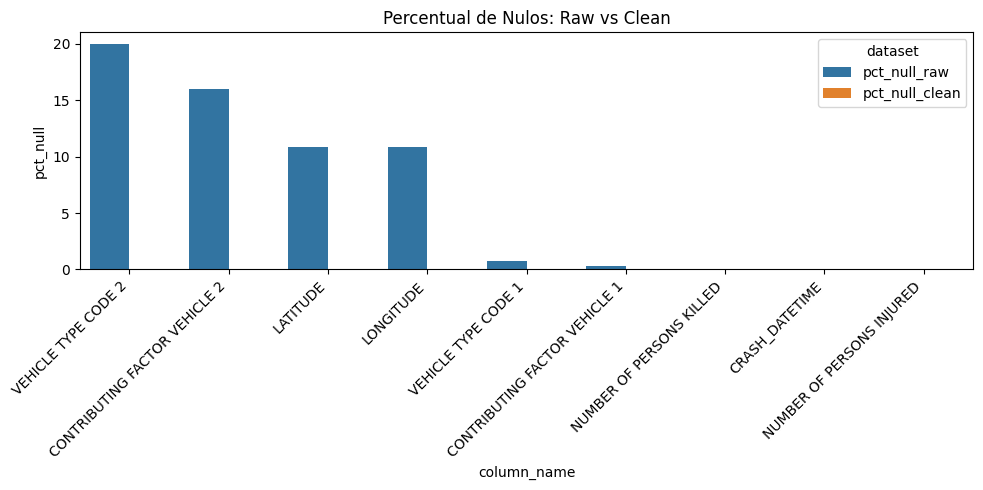

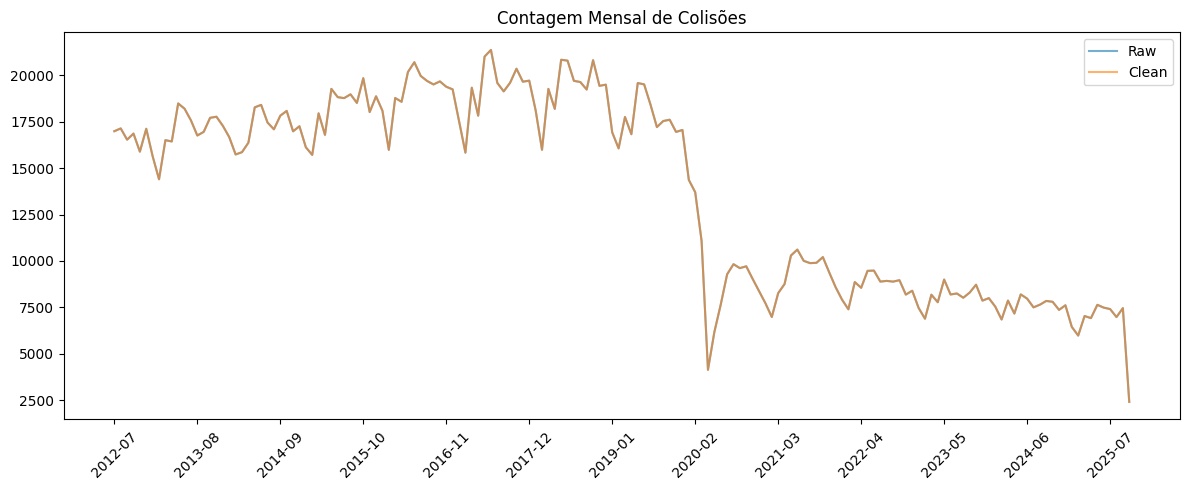

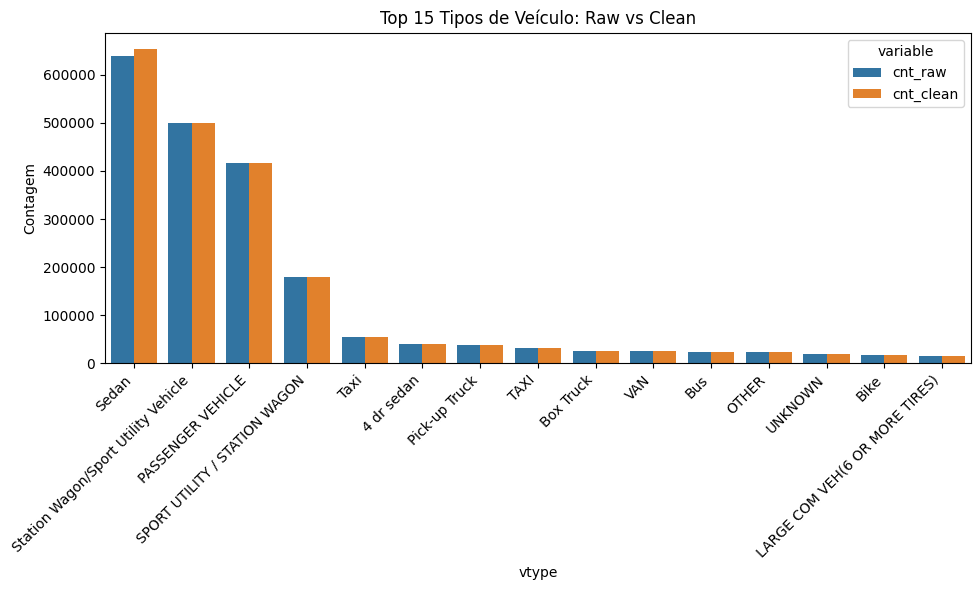

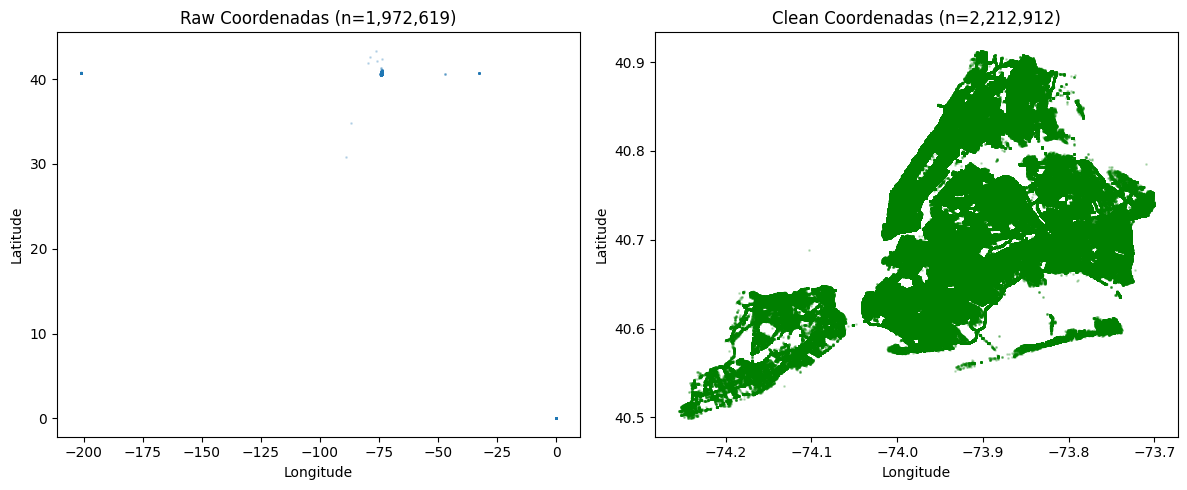

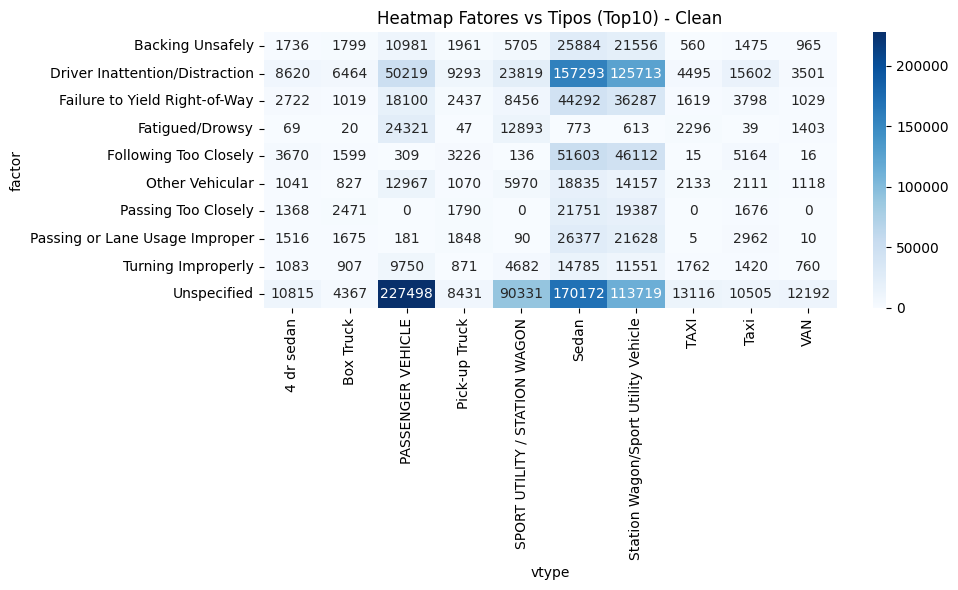

In [97]:
# Missing % comparação
miss_compare = nulls_raw[['column_name','pct_null']].merge(
    nulls_clean[['column_name','pct_null']], on='column_name', suffixes=('_raw','_clean')
)
plt.figure(figsize=(10,5))
miss_compare_melt = miss_compare.melt(id_vars='column_name', value_vars=['pct_null_raw','pct_null_clean'],
                                      var_name='dataset', value_name='pct_null')
sns.barplot(data=miss_compare_melt, x='column_name', y='pct_null', hue='dataset')
plt.xticks(rotation=45, ha='right')
plt.title('Percentual de Nulos: Raw vs Clean')
plt.tight_layout()
plt.show()

# Evolução mensal
plt.figure(figsize=(12,5))
plt.plot(monthly_raw['ym'], monthly_raw['cnt'], label='Raw', alpha=0.6)
plt.plot(monthly_clean['ym'], monthly_clean['cnt'], label='Clean', alpha=0.6)
plt.xticks(monthly_clean['ym'][::max(len(monthly_clean)//12,1)], rotation=45)
plt.title('Contagem Mensal de Colisões')
plt.legend()
plt.tight_layout()
plt.show()

# Top tipos de veículo antes/depois
veh_merge = veh_raw.merge(veh_clean, on='vtype', suffixes=('_raw','_clean'))
veh_merge['diff'] = veh_merge['cnt_clean'] - veh_merge['cnt_raw']
plt.figure(figsize=(10,6))
veh_merge_sorted = veh_merge.sort_values('cnt_clean', ascending=False).head(15)
sns.barplot(data=veh_merge_sorted.melt(id_vars='vtype', value_vars=['cnt_raw','cnt_clean']), x='vtype', y='value', hue='variable')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Tipos de Veículo: Raw vs Clean')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Coordenadas: distribuição completa (sem amostragem)
coords_raw = df_raw_sql[['LATITUDE','LONGITUDE']].dropna()
coords_clean = df_clean_sql[['LATITUDE','LONGITUDE']].dropna()

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(coords_raw['LONGITUDE'], coords_raw['LATITUDE'], s=1, alpha=0.2)
axes[0].set_title(f'Raw Coordenadas (n={len(coords_raw):,})')
axes[1].scatter(coords_clean['LONGITUDE'], coords_clean['LATITUDE'], s=1, alpha=0.2, color='green')
axes[1].set_title(f'Clean Coordenadas (n={len(coords_clean):,})')
for ax in axes:
    ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
plt.tight_layout(); plt.show()

# Heatmap fatores x tipos (clean) - todos os dados
factor_type = conn.execute("""
    SELECT "CONTRIBUTING FACTOR VEHICLE 1" AS factor, "VEHICLE TYPE CODE 1" AS vtype
    FROM crashes_clean
    WHERE factor IS NOT NULL AND vtype IS NOT NULL AND TRIM(factor)<>'' AND TRIM(vtype)<>''
""").df()

# limitar top para evitar matriz enorme
top_factors = factor_type['factor'].value_counts().head(10).index
top_vtypes = factor_type['vtype'].value_counts().head(10).index
matrix_df = factor_type[factor_type['factor'].isin(top_factors) & factor_type['vtype'].isin(top_vtypes)]
pivot = matrix_df.pivot_table(index='factor', columns='vtype', aggfunc=len, fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap Fatores vs Tipos (Top10) - Clean')
plt.tight_layout(); plt.show()